У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set default parameters for LaTex and font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

# Import .csv-file 
path = 'data/yulu_rental.csv'
yulu_rental_df = pd.read_csv(path)

yulu_rental_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

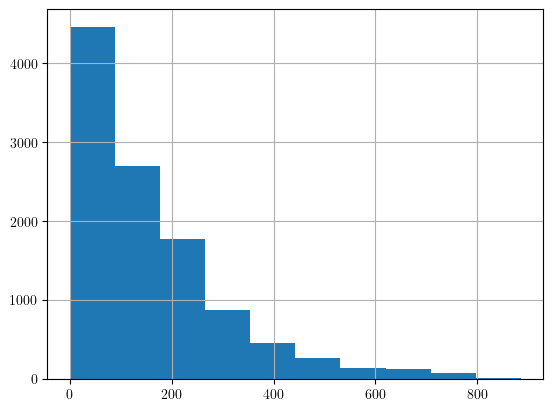

In [5]:
yulu_rental_df['registered'].hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

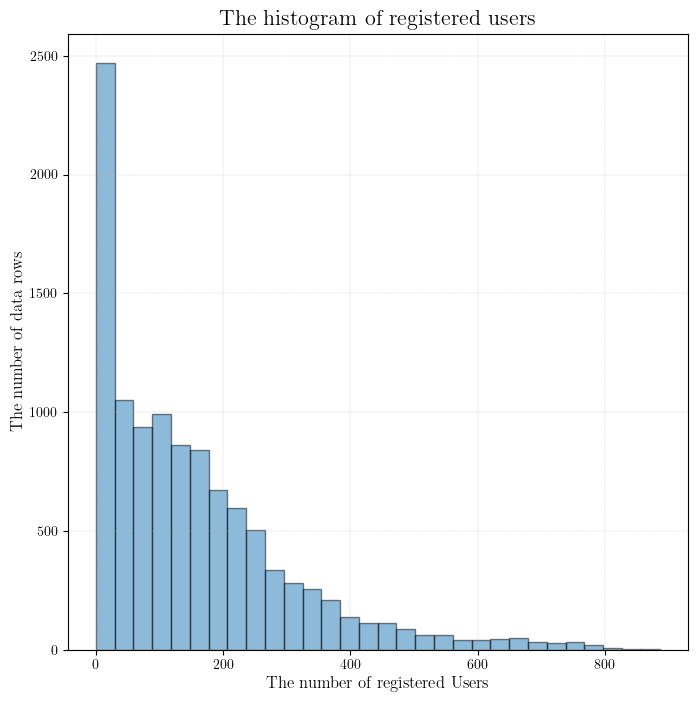

In [11]:
yulu_rental_df['registered'].hist(figsize=(8, 8),
                                  edgecolor='black',
                                  bins=30,
                                  alpha=0.5)

plt.title('The histogram of registered users', fontsize=16)
plt.xlabel('The number of registered Users', fontsize=12)
plt.ylabel('The number of data rows', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.3, alpha=0.7)

plt.show();

<h1 style='font-family: Garamond;'>Гістограма кількості зареєстрованих користувачів</h1>
<hr></hr>

<strong>1. Основні спостереження:</strong><br>
- **Горизонтальна вісь (X):** Кількість зареєстрованих користувачів у межах інтервалів.<br>
- **Вертикальна вісь (Y):** Кількість рядків даних, які відповідають певному інтервалу кількості користувачів.<br>
- Більшість значень реєстрацій **сконцентровані біля низьких значень** (0-100), що свідчить про асиметрію розподілу з **довгим правим хвостом**.<br><br>

<strong>2. Розподіл даних:</strong><br>
- Гістограма демонструє **правосторонньо асиметричний розподіл** (позитивний нахил).<br>
- Найбільша частка спостережень припадає на інтервал 0-50 зареєстрованих користувачів, де кількість рядків даних перевищує **2500**.<br>
- Зі збільшенням кількості зареєстрованих користувачів кількість відповідних рядків **поступово зменшується**.<br><br>

<strong>3. Аномалії та особливості:</strong><br>
- Спостерігається велика концентрація у нижньому діапазоні (0-100), що може вказувати на періоди з низькою активністю.<br>
- Довгий "хвіст" праворуч показує наявність рідкісних днів з високими показниками реєстрацій (понад 400), але їх кількість мінімальна.<br><br>

<strong>4. Статистичні характеристики:</strong><br>
- **Мода:** Значення, що найчастіше трапляються, припадають на інтервал <code>0-50</code>.<br>
- **Середнє значення:** Значно зміщене праворуч через наявність великих значень у хвості розподілу.<br>
- **Дисперсія:** Висока, що свідчить про широкий розкид кількості зареєстрованих користувачів.<br><br>

<strong>5. Подібність до статистичного розподілу:</strong><br>
- Ця гістограма нагадує **розподіл Пуассона** або **експоненційний розподіл**, оскільки дані мають:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;• Велику кількість значень біля нуля;<br>
    &nbsp;&nbsp;&nbsp;&nbsp;• Поступове зменшення частоти зі збільшенням значень;<br>
    &nbsp;&nbsp;&nbsp;&nbsp;• Довгий правий хвіст, що характерний для асиметричних розподілів.<br>
- Для точного висновку слід перевірити параметри розподілу та провести тест на відповідність даних до **розподілу Пуассона** або **лог-нормального розподілу**.<br><br>

<strong>6. Висновок:</strong><br>
Гістограма показує, що більшість днів характеризуються **низькою кількістю реєстрацій** (до 100 користувачів), тоді як значення понад 400 користувачів є рідкісними. Розподіл є правосторонньо асиметричним і подібний до **експоненційного або лог-нормального розподілу**, що вказує на вплив рідкісних, але значних подій, які викликають сплески реєстрацій.



--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [12]:
yulu_rental_df['datetime'] = pd.to_datetime(yulu_rental_df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [13]:
yulu_rental_df['dayofweek'] = yulu_rental_df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [14]:
yulu_rental_df[['datetime','dayofweek']][yulu_rental_df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

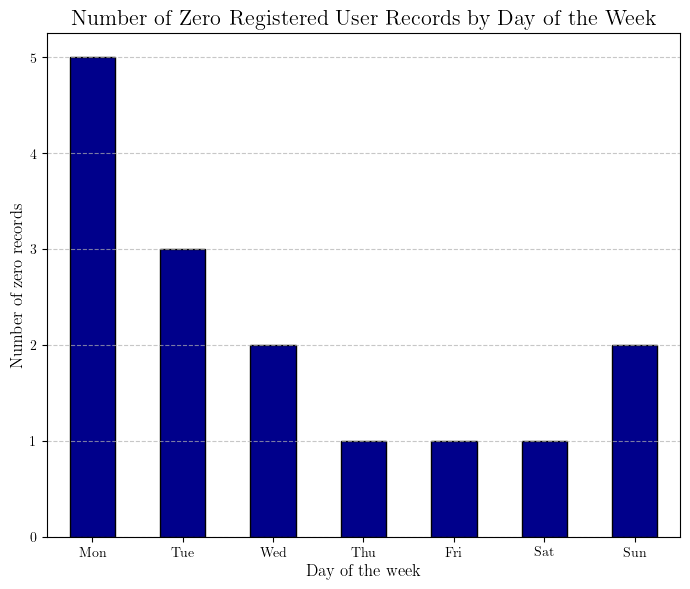

In [36]:
zero_registered_activity_by_day_df = yulu_rental_df[yulu_rental_df['registered']==0].groupby('dayofweek').size()

plt.figure(figsize=(7, 6))
zero_registered_activity_by_day_df.plot(kind='bar', color='darkblue', edgecolor='black')

plt.title('Number of Zero Registered User Records by Day of the Week', fontsize=16)
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Number of zero records', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

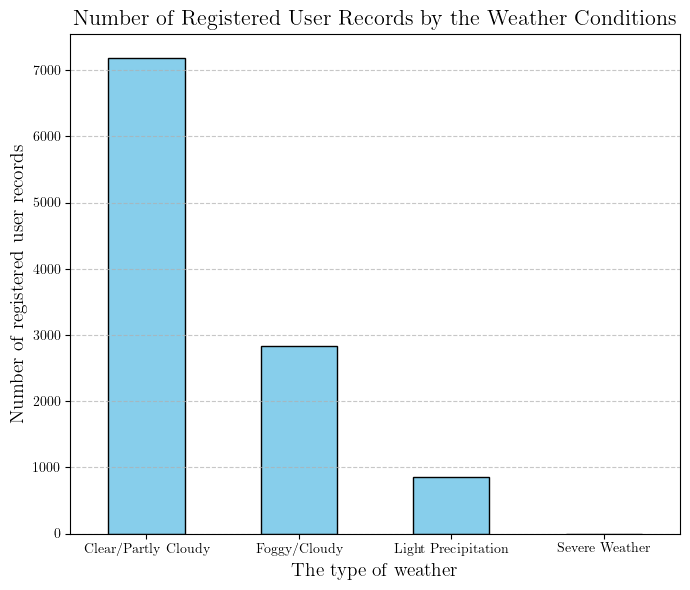

In [89]:
weather_type_registered_activity_by_day_df = yulu_rental_df.groupby('weather')['registered'].count()

plt.figure(figsize=(7, 6))
weather_type_registered_activity_by_day_df.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Registered User Records by the Weather Conditions', fontsize=16)
plt.xlabel('The type of weather', fontsize=14)
plt.ylabel('Number of registered user records', fontsize=14)
plt.xticks(ticks=range(4), labels=['Clear/Partly Cloudy', 'Foggy/Cloudy', 'Light Precipitation', 'Severe Weather'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h1 style='font-family: Garamond;'>Аналіз візуалізації: Кількість реєстрацій користувачів за типом погоди</h1>
<hr></hr>

<strong>1. Опис графіка:</strong><br>
- **Горизонтальна вісь (X):** Тип погодних умов (<code>Clear/Partly Cloudy</code>, <code>Foggy/Cloudy</code>, <code>Light Precipitation</code>, <code>Severe Weather</code>).<br>
- **Вертикальна вісь (Y):** Кількість зареєстрованих користувачів (до 7000).<br>
- **Тип графіка:** Стовпчаста діаграма (Bar Plot), яка порівнює кількість реєстрацій між різними погодними умовами.<br><br>

<strong>2. Логічний аналіз візуалізації:</strong><br>
- **Логічність категорій:** Категорії погодних умов мають сенс, оскільки вони є загальноприйнятими для поділу метеорологічних даних.<br>
- **Розподіл даних:** Графік показує, що більшість реєстрацій відбуваються під час <code>Clear/Partly Cloudy</code> умов (~7000), тоді як кількість реєстрацій під час <code>Severe Weather</code> дорівнює нулю.<br><br>

<strong>3. Обґрунтованість:</strong><br>
- Реєстрація більшої кількості користувачів у ясну або частково хмарну погоду є логічною, оскільки сприятливі погодні умови зазвичай асоціюються з більшою активністю користувачів.<br>
- Менша активність під час <code>Light Precipitation</code> і мала кількість (наближена до 0) реєстрацій у <code>Severe Weather</code> виглядають реалістично, оскільки важкі погодні умови можуть обмежувати можливість користувачів реєструватися.<br>
- Високі значення для <code>Foggy/Cloudy</code> також логічні, оскільки така погода є менш обмежувальною порівняно з опадами чи важкими умовами.<br><br>

<strong>4. Можливі аномалії чи уточнення:</strong><br>
- Дуже мала кількість реєстрацій під час <code>Severe Weather</code> може бути зумовлена двома факторами:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;• Несприятливі умови.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;• Неповними або недостатньо зібраними даними для цієї категорії.<br>

<strong>5. Висновок:</strong><br>
Побудована візуалізація має логічний сенс і відповідає очікуваному розподілу даних:<br>
- **Найбільше реєстрацій** під час ясної або частково хмарної погоди, що є нормальним і очікуваним.<br>
- **Низька активність** у дощову погоду та дуже мала активність у важкі погодні умови виглядають обґрунтовано.<br>
- Однак слід перевірити, чи дані для категорії <code>Severe Weather</code> дійсно повні й надійні.</p>


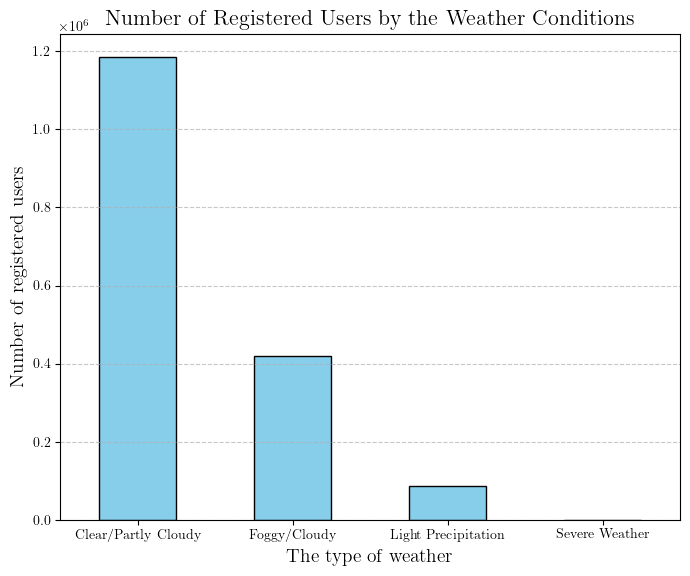

In [92]:
weather_type_registered_activity_by_day_df = yulu_rental_df.groupby('weather')['registered'].sum()

plt.figure(figsize=(7, 6))
weather_type_registered_activity_by_day_df.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Registered Users by the Weather Conditions', fontsize=16)
plt.xlabel('The type of weather', fontsize=14)
plt.ylabel('Number of registered users', fontsize=14)
plt.xticks(ticks=range(4), labels=['Clear/Partly Cloudy', 'Foggy/Cloudy', 'Light Precipitation', 'Severe Weather'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

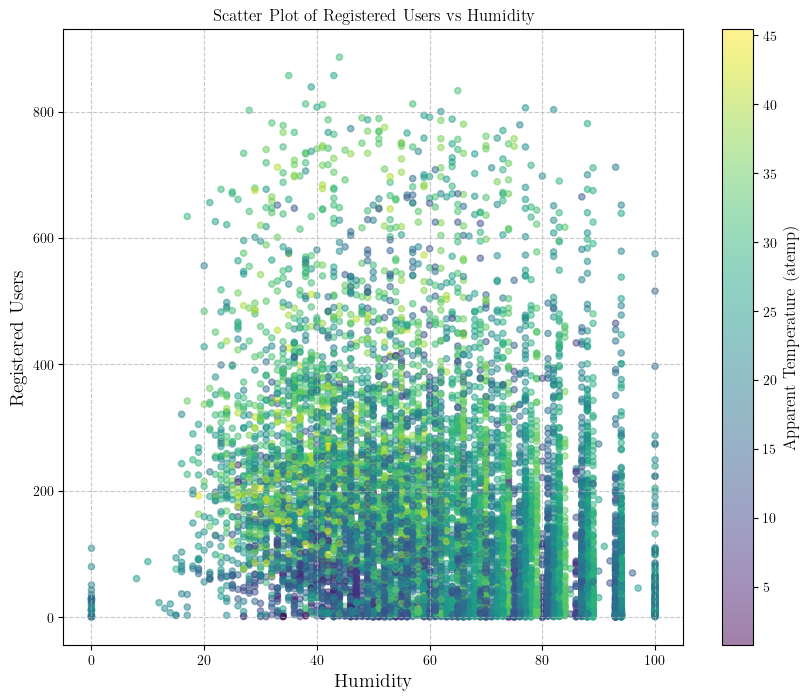

In [87]:
col_x, col_y = 'humidity', 'registered'
color_definition = yulu_rental_df['atemp']

yulu_rental_df_scatter_plot = yulu_rental_df.plot.scatter(x=col_x, y=col_y, c=color_definition, cmap='viridis', 
                            alpha=0.5, figsize=(10, 8), colorbar=False)  # to avoid creating double colorbar on the following visualization 
                                                                         # we should disable the <colorbar=True> parameter and set it into FALSE
                                                                    

# Create a colorbar and its label 
colorbar = yulu_rental_df_scatter_plot.figure.colorbar(yulu_rental_df_scatter_plot.collections[0], ax=yulu_rental_df_scatter_plot)
colorbar.set_label('Apparent Temperature (atemp)', fontsize=12)

plt.title('Scatter Plot of Registered Users vs Humidity')
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Registered Users', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<h1 style='font-family: Garamond;'>Діаграма розсіювання: Вологість (<code>Humidity</code>) та кількість зареєстрованих користувачів</h1>
<hr></hr>

<strong>1. Опис графіка:</strong><br>
- **Горизонтальна вісь (X):** <code>Humidity</code> (вологість), у відсотках від 0 до 100%.<br>
- **Вертикальна вісь (Y):** Кількість зареєстрованих користувачів (<code>Registered Users</code>), до приблизно 800.<br>
- **Колір точок:** Відображає значення <code>Apparent Temperature</code> (сприйнята температура, <code>atemp</code>) за кольоровою шкалою від фіолетового (низька температура) до жовтого (висока температура).<br><br>

<strong>2. Основні спостереження:</strong><br>
- Кількість користувачів реєструється у широкому діапазоні вологості, переважно від 10% до 100%.<br>
- **Щільність точок:** Найвища концентрація точок спостерігається у діапазоні **50-100% вологості** з кількістю зареєстрованих користувачів до 400.<br>
- Спостерігаються **поодинокі сплески** кількості зареєстрованих користувачів до 800 при різних значеннях вологості, що може вказувати на аномальні дні чи зовнішні фактори.<br><br>

<strong>3. Вплив температури:</strong><br>
- Точки з **вищою сприйманою температурою** (жовті відтінки) помітні у верхній частині графіка, що може свідчити про зв'язок між високою температурою та більшою кількістю реєстрацій.<br>
- У діапазоні **низьких температур** (фіолетові відтінки) реєстрації користувачів менш помітні та здебільшого зосереджені у нижніх значеннях кількості.<br><br>

<strong>4. Кореляція між змінними:</strong><br>
- **Вологість та кількість зареєстрованих користувачів** не показують чіткої лінійної залежності. Дані розподілені хаотично, але щільність точок збільшується із ростом вологості.<br>
- Наявність користувачів у різних діапазонах вологості вказує на **нелінійний зв'язок** з можливими сторонніми впливами, наприклад, температурою чи іншими факторами.<br><br>

<strong>5. Аномалії та цікаві особливості:</strong><br>
- Сплески у реєстрації користувачів до 800 осіб є рідкісними й можуть вказувати на певні події, кампанії або випадкові фактори.<br>
- Підвищена вологість (>80%) пов'язана з наявністю реєстрацій, але температура залишається важливим модулюючим фактором.<br><br>

<strong>6. Висновок:</strong><br>
Діаграма розсіювання демонструє, що кількість зареєстрованих користувачів залежить від вологості та температури, проте зв'язок є нелінійним. Щільність реєстрацій зростає при високій вологості (50-100%) та сприйманих температурах у діапазоні **15-30°C** (зелено-блакитні відтінки), що вказує на оптимальні умови для активності користувачів.
